In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

In [2]:
df = pd.read_csv('house_prices.csv')
df = df.drop(['id', 'date', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'], axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,1410,1287


In [3]:
x = df.drop('price', axis=1)
y = df['price']

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [5]:
sc=StandardScaler()
scaler = sc.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [6]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100),max_iter = 100,activation = 'relu',solver = 'adam',early_stopping=True)
mlp_reg.fit(x_train_scaled, y_train)

C:\Users\prthm\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(early_stopping=True, hidden_layer_sizes=(150, 100), max_iter=100)

In [7]:
y_pred = mlp_reg.predict(x_test_scaled)

In [8]:
mlp_reg.score(x_test_scaled,y_test)

0.6511230088851434

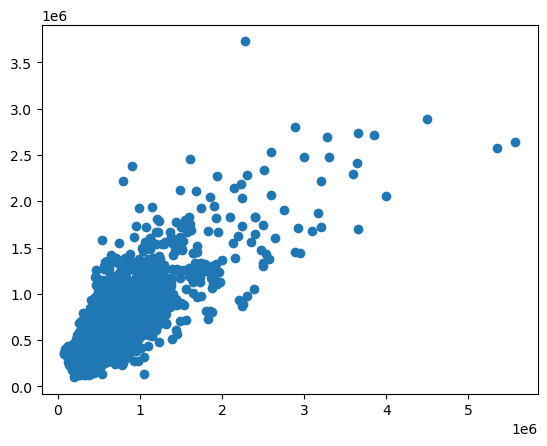

In [9]:
plt.scatter(y_test,y_pred)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

mlp_regressor = MLPRegressor(hidden_layer_sizes=(128,64),max_iter = 1000,activation = 'relu',solver = 'adam')
y = df['price']
y_max = max(y)
y_train = y_train/y_max
y_test = y_test/y_max
x_train = x_train_scaled
x_test = x_test_scaled
training_mse = []
training_r2=[]
testing_mse=[]
testing_r2=[]
for i in range(1, 501):
    mlp_regressor.partial_fit(x_train, y_train)
    predictions_train = mlp_regressor.predict(x_train)
    test_guesses=mlp_regressor.predict(x_test)
    test_mse = mean_squared_error(y_test, test_guesses)
    testing_mse.append(test_mse)
    r2_test = r2_score(y_test, test_guesses)
    testing_r2.append(r2_test)

    mse_train = mean_squared_error(y_train, predictions_train)
    training_mse.append(mse_train)
    # acc = mlp_regressor.score(x_train, y_train)
    # training_accuracy.append(acc)
    r2_train = r2_score(y_train, predictions_train)
    training_r2.append(r2_train)

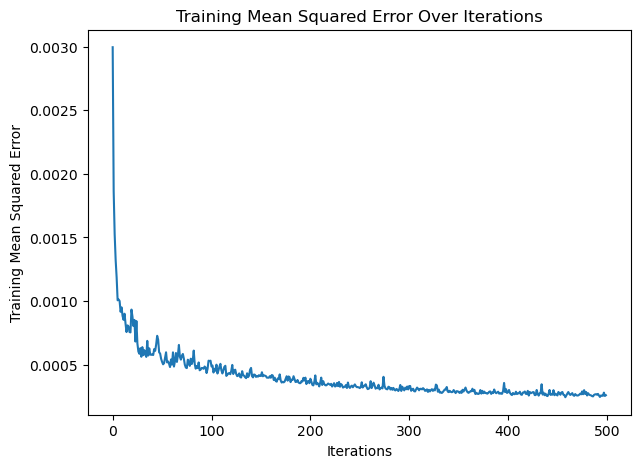

In [11]:
plt.figure(figsize=(7,5))
# plt.subplot(131)
plt.plot(training_mse)
plt.title('Training Mean Squared Error Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Training Mean Squared Error')
plt.show()

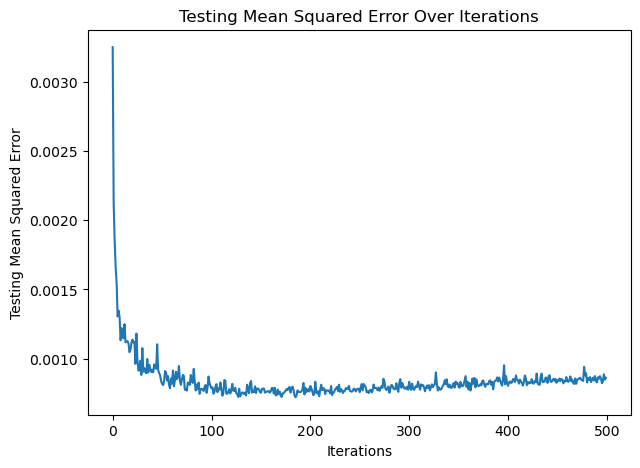

In [12]:
plt.figure(figsize=(7,5))
# plt.subplot(131)
plt.plot(testing_mse)
plt.title('Testing Mean Squared Error Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Testing Mean Squared Error')
plt.show()

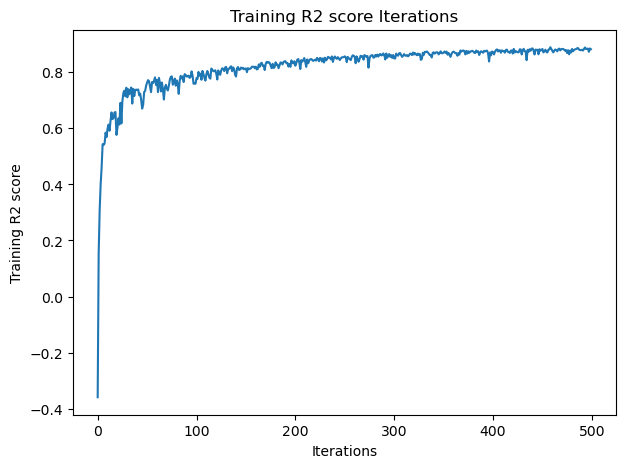

In [13]:
plt.figure(figsize=(7,5))
plt.plot(training_r2)
plt.title('Training R2 score Iterations')
plt.xlabel('Iterations')
plt.ylabel('Training R2 score')
plt.show()

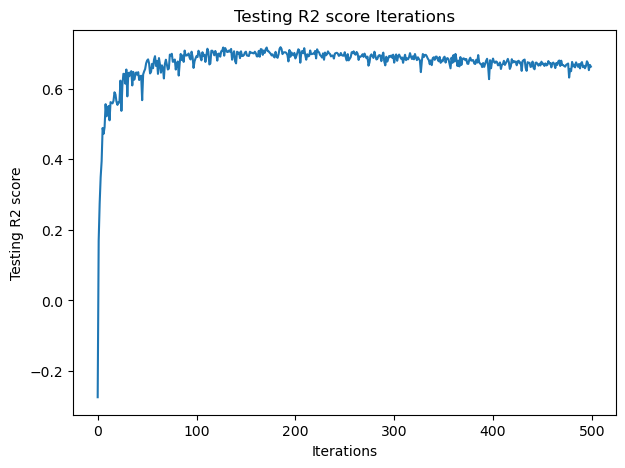

In [14]:
plt.figure(figsize=(7,5))
plt.plot(testing_r2)
plt.title('Testing R2 score Iterations')
plt.xlabel('Iterations')
plt.ylabel('Testing R2 score')
plt.show()

In [15]:
print("train size: ", x_train.shape[0])
print("Final training R2 score: ", training_r2[-1])
print("Final training MSE: ", training_mse[-1])
print("test size: ", x_test.shape[0])
print("Test MSE: ",testing_mse[-1])
print("Test R2: ", testing_r2[-1])

train size:  17290
Final training R2 score:  0.8823207178869936
Final training MSE:  0.0002593124485652885
test size:  4323
Test MSE:  0.00086195436876045
Test R2:  0.6619500863534012
